In [1]:
#!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor

In [3]:
# loading the dataset
crop_data=pd.read_csv("C:/Users/USER/Desktop/Projects/Crop-Yield-Prediction/Data/data2/crop_production.csv")
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
#Identify the datatype of variables
crop_data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [5]:
#Finding the missing values
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
# Dropping missing values 
crop_data = crop_data.dropna()

In [7]:
#checking if there still missing values
crop_data.isnull().values.any()

False

In [8]:
#Creating a training set for modeling and validation set to check model performance
X = crop_data.drop(['Production'], axis=1)
y = crop_data.Production

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [10]:
#Look at the data type of variables
X.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
dtype: object

Now, you’ll see that we will only identify categorical variables. We will not perform any preprocessing steps for categorical variables:

In [11]:
import warnings 
warnings.filterwarnings('ignore')
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [12]:
model=CatBoostRegressor(iterations=500, max_depth=5, learning_rate=0.05, random_seed=1066, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 16927540.8752611	test: 15342220.8798972	best: 15342220.8798972 (0)	total: 205ms	remaining: 1m 42s
1:	learn: 16400180.9487736	test: 14716038.1340423	best: 14716038.1340423 (1)	total: 263ms	remaining: 1m 5s
2:	learn: 15941713.5753875	test: 14151016.6761487	best: 14151016.6761487 (2)	total: 292ms	remaining: 48.4s
3:	learn: 15470032.5251895	test: 13563346.0591397	best: 13563346.0591397 (3)	total: 335ms	remaining: 41.5s
4:	learn: 15032472.3497914	test: 13078995.1133023	best: 13078995.1133023 (4)	total: 375ms	remaining: 37.1s
5:	learn: 14617996.8068006	test: 12560815.9165178	best: 12560815.9165178 (5)	total: 419ms	remaining: 34.5s
6:	learn: 14189147.7965635	test: 12123775.2010394	best: 12123775.2010394 (6)	total: 450ms	remaining: 31.7s
7:	learn: 13834314.4320504	test: 11701409.9318964	best: 11701409.9318964 (7)	total: 487ms	remaining: 30s
8:	learn: 13463293.6160860	test: 11323461.0212737	best: 11323461.0212737 (8)	total: 535ms	remaining: 29.2s
9:	learn: 13137025.7480594	test: 10909

78:	learn: 7308043.2046351	test: 6367818.4719660	best: 6273631.2994421 (63)	total: 3.33s	remaining: 17.8s
79:	learn: 7302441.3068499	test: 6362140.0571683	best: 6273631.2994421 (63)	total: 3.39s	remaining: 17.8s
80:	learn: 7269751.6360789	test: 6372695.7735938	best: 6273631.2994421 (63)	total: 3.42s	remaining: 17.7s
81:	learn: 7269625.4762642	test: 6372978.9623719	best: 6273631.2994421 (63)	total: 3.46s	remaining: 17.6s
82:	learn: 7247897.3984338	test: 6374398.4400562	best: 6273631.2994421 (63)	total: 3.51s	remaining: 17.6s
83:	learn: 7240324.9944752	test: 6383110.6822745	best: 6273631.2994421 (63)	total: 3.56s	remaining: 17.6s
84:	learn: 7195506.5745225	test: 6389335.3522178	best: 6273631.2994421 (63)	total: 3.62s	remaining: 17.7s
85:	learn: 7195407.4536203	test: 6389601.2150349	best: 6273631.2994421 (63)	total: 3.65s	remaining: 17.6s
86:	learn: 7195198.2774502	test: 6390190.9944751	best: 6273631.2994421 (63)	total: 3.69s	remaining: 17.5s
87:	learn: 7184961.2864579	test: 6387848.95820

156:	learn: 6660681.7632973	test: 5812985.6018732	best: 5812985.6018732 (156)	total: 8.21s	remaining: 17.9s
157:	learn: 6650342.5673441	test: 5810340.7788627	best: 5810340.7788627 (157)	total: 8.29s	remaining: 18s
158:	learn: 6640772.2966934	test: 5806587.1173057	best: 5806587.1173057 (158)	total: 8.39s	remaining: 18s
159:	learn: 6625355.5950386	test: 5777350.0891872	best: 5777350.0891872 (159)	total: 8.47s	remaining: 18s
160:	learn: 6616001.4113151	test: 5774142.8098500	best: 5774142.8098500 (160)	total: 8.57s	remaining: 18.1s
161:	learn: 6610963.2819112	test: 5778303.7521856	best: 5774142.8098500 (160)	total: 8.69s	remaining: 18.1s
162:	learn: 6610944.2543307	test: 5778418.0402541	best: 5774142.8098500 (160)	total: 8.76s	remaining: 18.1s
163:	learn: 6604569.5599914	test: 5783743.0924909	best: 5774142.8098500 (160)	total: 8.87s	remaining: 18.2s
164:	learn: 6598798.6749765	test: 5759973.2595645	best: 5759973.2595645 (164)	total: 9.01s	remaining: 18.3s
165:	learn: 6598678.8428432	test: 

235:	learn: 6269765.9824773	test: 5490890.4051641	best: 5490231.3334820 (233)	total: 14.1s	remaining: 15.7s
236:	learn: 6269749.2263193	test: 5490997.4796660	best: 5490231.3334820 (233)	total: 14.1s	remaining: 15.7s
237:	learn: 6267220.9092915	test: 5485550.6583113	best: 5485550.6583113 (237)	total: 14.2s	remaining: 15.6s
238:	learn: 6252712.1927166	test: 5481527.3329030	best: 5481527.3329030 (238)	total: 14.3s	remaining: 15.6s
239:	learn: 6252662.6211849	test: 5481701.9672630	best: 5481527.3329030 (238)	total: 14.3s	remaining: 15.5s
240:	learn: 6252655.0550259	test: 5481776.6536590	best: 5481527.3329030 (238)	total: 14.3s	remaining: 15.4s
241:	learn: 6248887.8633033	test: 5485103.0314761	best: 5481527.3329030 (238)	total: 14.4s	remaining: 15.4s
242:	learn: 6246795.0376565	test: 5488714.7779713	best: 5481527.3329030 (238)	total: 14.5s	remaining: 15.3s
243:	learn: 6246784.2270917	test: 5488790.3222993	best: 5481527.3329030 (238)	total: 14.5s	remaining: 15.2s
244:	learn: 6240645.9301563	

313:	learn: 5957335.4549205	test: 5270409.4943466	best: 5269720.1677411 (310)	total: 19.9s	remaining: 11.8s
314:	learn: 5957326.3041930	test: 5270483.2643603	best: 5269720.1677411 (310)	total: 20s	remaining: 11.7s
315:	learn: 5957319.2828555	test: 5270553.5879122	best: 5269720.1677411 (310)	total: 20s	remaining: 11.6s
316:	learn: 5949550.3148070	test: 5277189.2140555	best: 5269720.1677411 (310)	total: 20.1s	remaining: 11.6s
317:	learn: 5949545.1035701	test: 5277250.5550971	best: 5269720.1677411 (310)	total: 20.1s	remaining: 11.5s
318:	learn: 5949540.3991237	test: 5277309.1117037	best: 5269720.1677411 (310)	total: 20.1s	remaining: 11.4s
319:	learn: 5944875.0893810	test: 5254894.1887840	best: 5254894.1887840 (319)	total: 20.2s	remaining: 11.4s
320:	learn: 5944868.7530573	test: 5254954.0596060	best: 5254894.1887840 (319)	total: 20.3s	remaining: 11.3s
321:	learn: 5941525.0089402	test: 5255168.3454555	best: 5254894.1887840 (319)	total: 20.4s	remaining: 11.3s
322:	learn: 5938392.8820167	test

392:	learn: 5750654.9983509	test: 5120399.0885944	best: 5119848.7620565 (391)	total: 26.1s	remaining: 7.09s
393:	learn: 5750444.2729510	test: 5119623.4727671	best: 5119623.4727671 (393)	total: 26.2s	remaining: 7.05s
394:	learn: 5743413.3046290	test: 5115418.2989990	best: 5115418.2989990 (394)	total: 26.3s	remaining: 6.99s
395:	learn: 5741896.2070019	test: 5116264.3653044	best: 5115418.2989990 (394)	total: 26.4s	remaining: 6.93s
396:	learn: 5735069.0280802	test: 5112236.5454771	best: 5112236.5454771 (396)	total: 26.5s	remaining: 6.88s
397:	learn: 5727138.5076864	test: 5119193.0447805	best: 5112236.5454771 (396)	total: 26.6s	remaining: 6.82s
398:	learn: 5724412.3581887	test: 5107116.1221947	best: 5107116.1221947 (398)	total: 26.7s	remaining: 6.75s
399:	learn: 5720890.8826512	test: 5101038.1727759	best: 5101038.1727759 (399)	total: 26.8s	remaining: 6.69s
400:	learn: 5717969.9632961	test: 5095960.7435710	best: 5095960.7435710 (400)	total: 26.9s	remaining: 6.63s
401:	learn: 5716195.5561279	

471:	learn: 5465629.8640540	test: 4961866.4678964	best: 4960187.0736728 (469)	total: 32.9s	remaining: 1.95s
472:	learn: 5463393.1658882	test: 4960344.2210606	best: 4960187.0736728 (469)	total: 33s	remaining: 1.88s
473:	learn: 5463034.7682644	test: 4960037.9346816	best: 4960037.9346816 (473)	total: 33s	remaining: 1.81s
474:	learn: 5461710.6906138	test: 4961900.3676546	best: 4960037.9346816 (473)	total: 33.1s	remaining: 1.74s
475:	learn: 5460367.0555602	test: 4960000.2735211	best: 4960000.2735211 (475)	total: 33.2s	remaining: 1.67s
476:	learn: 5457233.1981159	test: 4957218.9795237	best: 4957218.9795237 (476)	total: 33.3s	remaining: 1.6s
477:	learn: 5457209.5779839	test: 4957401.7539338	best: 4957218.9795237 (476)	total: 33.4s	remaining: 1.54s
478:	learn: 5449455.7736577	test: 4962464.0272144	best: 4957218.9795237 (476)	total: 33.5s	remaining: 1.47s
479:	learn: 5444642.4754170	test: 4959367.1411494	best: 4957218.9795237 (476)	total: 33.6s	remaining: 1.4s
480:	learn: 5438303.3415182	test: 

In [13]:
from sklearn.metrics import r2_score
model_predict = model.predict(X_validation)

r = r2_score(y_validation,model_predict)
print("R_Square score : ",r)

R_Square score :  0.9062430015776306


Text(0.5, 1.0, 'CatBoost Regression')

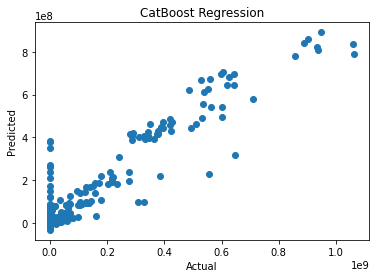

In [14]:
plt.scatter(y_validation,model_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CatBoost Regression')

In [15]:
# Calculating Adj. R2 score: 
Adjr2_2 = 1 - (1-r)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Adj. R_Squared : {}".format(Adjr2_2))

Adj. R_Squared : 0.9062352639364304


Text(0.5, 1.0, 'CatBoost Regression')

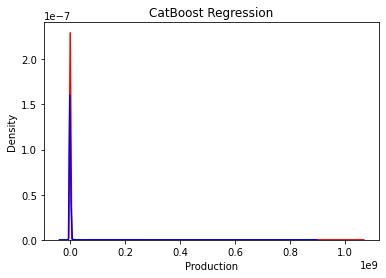

In [16]:
ax = sns.distplot(y_validation, hist = False, color = "r", label = "Actual value ")
sns.distplot(model_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('CatBoost Regression')

Text(0.5, 1.0, 'Feature Importance')

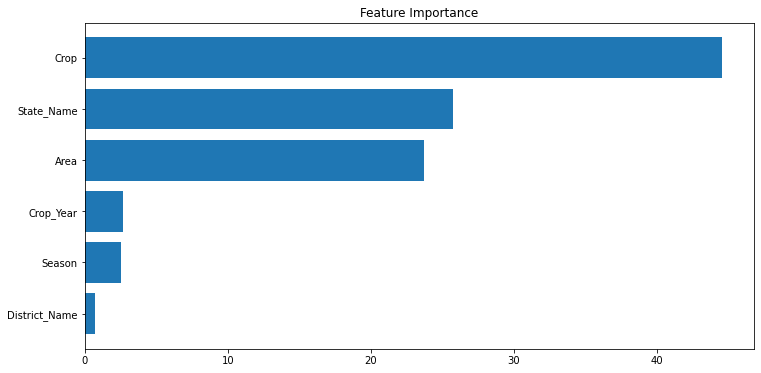

In [17]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_validation.columns)[sorted_idx])
plt.title('Feature Importance')

In [18]:
# save the best model to file
import joblib

joblib.dump(model, 'catboost_model.pkl')

['catboost_model.pkl']